In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

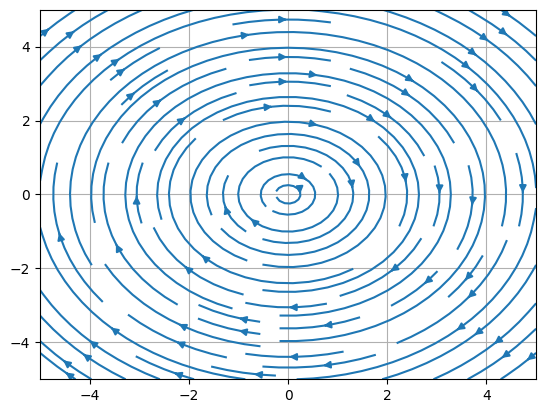

In [2]:
t, x1_0, x2_0 = smp.symbols('t x1_0 x2_0') # define symbols t, x1_0, x2_0
A = np.array([[0, 2],
              [-2, 0]]) # define matrix A (xdot = Ax)
X0 = smp.Matrix([[x1_0],[x2_0]]) # define initial conditions matrix
e, T = np.linalg.eig(A) # eigenvalues (e) and eigenvectors (T) of A
D = smp.Matrix.diag(list(map(complex, e))) # diagonal matrix of eigenvalues
T = smp.Matrix(T)
G = T @ smp.exp(D*t) @ T.inv() # Te(D)T-1
x = G @ X0
dx = A @ X0
x_t = x.subs([(t, 0.1)]) # evaluate x at time t = 0.1s
a = np.linspace(-5, 5, 101) # initial conditions span
X1, X2 = np.meshgrid(a, a) # coordinate matrices
dx_f = smp.lambdify([x1_0, x2_0], dx) # define xdot as a function of initial conditions x1_0, x2_0
dx_e = dx_f(X1,X2) # evaluate xdot as x1_0 = X1, x2_0 = X2
plt.streamplot(X1, X2, dx_e[0][0], dx_e[1][0])
plt.grid('on')

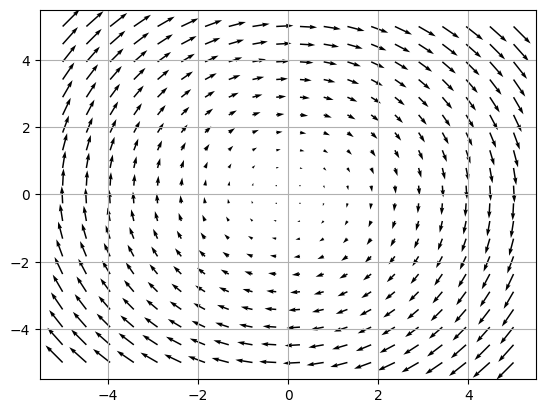

In [3]:
a = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(a, a)
plt.quiver(X, Y, dx_f(X,Y)[0][0], dx_f(X,Y)[1][0])
plt.grid('on')